In [ ]:
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report,balanced_accuracy_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer


from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("../py")
#from utils import *

from sklearn import linear_model, utils, svm
from sklearn.utils import resample
from imblearn.under_sampling import ClusterCentroids, EditedNearestNeighbours, RandomUnderSampler, TomekLinks, CondensedNearestNeighbour
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("/content/eda_preprocess.csv")
df

Unnamed: 0                                               Text  label  \
0               0  ['click', 'free', 'download', 'colorfully', 'i...      1   
1               1  ['may', 'may', 'jew', 'certainly', 'stupid', '...      1   
2               2  ['always', 'considered', 'teaching', 'one', 'p...      1   
3               3  ['sad', 'thing', 'white', 'student', 'school',...      1   
4               4  ['god', 'often', 'pale', 'skin', 'blue', 'eye'...      1   
...           ...                                                ...    ...   
74415       58068                        ['english', 'conservative']      0   
74416       58069                              ['recent', 'comment']      0   
74417       58070                             ['report', 'document']      0   
74418       58071                             ['we25918gif', 'byte']      0   
74419       58072        ['dali', '2267646', 'want', 'see', 'truth']      0   

       word_ct   avg_wrd                                              Text2  
0           22  5.909091  'click', 'free', 'download', 'colorfully', 'il...  
1           38  3.789474  'may', 'may', 'jew', 'certainly', 'stupid', 's...  
2           32  4.062500  'always', 'considered', 'teaching', 'one', 'pr...  
3           17  3.823529  'sad', 'thing', 'white', 'student', 'school', ...  
4           21  4.809524  'god', 'often', 'pale', 'skin', 'blue', 'eye',...  
...        ...       ...                                                ...  
74415        3  7.333333                          'english', 'conservative'  
74416        2  7.000000                                'recent', 'comment'  
74417        4  4.750000                               'report', 'document'  
74418        5  5.000000                               'we25918gif', 'byte'  
74419       14  3.500000          'dali', '2267646', 'want', 'see', 'truth'  

[74420 rows x 6 columns]

In [ ]:
c = df.columns
c

Index(['Unnamed: 0', 'Text', 'label', 'word_ct', 'avg_wrd', 'Text2'], dtype='object')

In [ ]:
train = df['Text']
test = df['label']

In [ ]:
# train = df[df['label'] == 1]['Text']
# test = df[df['label'] == 1][['Racism','Cyberbullying / Bullying / Bad words', 'Sexism', 'Religion', 'General']]

In [ ]:
# set aside 20% of train and test data for evaluation
X_train, X_val, y_train, y_val = train_test_split(train, test, test_size=0.2, shuffle = True, random_state = 8)


print("X_train shape: {}".format(X_train.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_val shape: {}".format(y_val.shape))


print("========================")

# Use the same function above for the validation set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2


print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))





X_train shape: (59536,)
X_val shape: (14884,)
y_train shape: (59536,)
y_val shape: (14884,)
X_train shape: (44652,)
y_train shape: (44652,)
X_test shape: (14884,)
y_test shape: (14884,)


In [ ]:
vec = TfidfVectorizer()
tfidf_tr = vec.fit_transform(X_train)
#vec = get_feature_names_out()
tfidf_val = vec.transform(X_test)

In [ ]:
print(tfidf_tr.shape,tfidf_val.shape)

(44652, 39706) (14884, 39706)


In [ ]:
print(tfidf_val)

  (0, 35705)	0.4818634469665467
  (0, 35508)	0.4082790152853862
  (0, 34712)	0.5032838044214248
  (0, 23380)	0.3361097291123883
  (0, 19031)	0.3633810990243786
  (0, 5675)	0.3206332846571645
  (1, 38465)	0.3723526341062801
  (1, 28858)	0.45887328244917247
  (1, 25272)	0.31665126253637177
  (1, 20730)	0.33422798070563514
  (1, 20534)	0.1855425854830783
  (1, 12565)	0.24227830240637088
  (1, 4799)	0.4489516913918393
  (1, 1817)	0.2783345448294553
  (1, 1771)	0.2581857751355022
  (2, 32184)	0.3004241973188602
  (2, 30461)	0.3783054240759114
  (2, 24087)	0.32264500474101127
  (2, 22791)	0.2406198618792092
  (2, 8704)	0.18836413888087927
  (2, 8411)	0.2781612579904376
  (2, 8312)	0.42957660288213617
  (2, 3092)	0.3799482830667148
  (2, 1543)	0.40358530814774174
  (3, 38061)	0.3285857499885293
  :	:
  (14881, 13945)	0.32486103917306447
  (14881, 13340)	0.40344206756830675
  (14881, 4371)	0.34939664458170483
  (14883, 38002)	0.11567388369856993
  (14883, 37953)	0.11835691054205309
  (14883, 3

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, auc, average_precision_score, confusion_matrix, roc_auc_score
from tqdm import tqdm
import re
import nltk
from nltk.stem.porter import PorterStemmer
from textblob import Word
import datetime
import pandas as pd
import requests
import sys
sys.path.append("../py")

import gensim
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

def accuracy(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    tn = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 0])
    return (tp + tn) / float(len(y_y_hat))

def f1(y, y_hat):
    precision_score = precision(y, y_hat)
    recall_score = recall(y, y_hat)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)

def precision(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fp = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 1])
    return tp / float(tp + fp)

def recall(y, y_hat):
    # Your code here
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fn = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 0])
    return tp / float(tp + fn)

def auc(X, y, model):
    """
        Function to calculate ROC-AUC Score based on predict_proba(X)
        where X is feature values, y is target values, and model is instantiated model variable
    """
    probs = model.predict_proba(X)[:,1] 
    return roc_auc_score(y, probs)

def auc2(X, y, model):
    """
        Function to calculate ROC-AUC Score based on decision_function(X)
        where X is feature values, y is target values, and model is instantiated model variable
    """
    probs = model.decision_function(X)
    return roc_auc_score(y, probs)

def aps(X, y, model):
    """
        Function to calculate PR-AUC Score based on predict_proba(X)
        where X is feature values, y is target values, and model is instantiated model variable
    """
    probs = model.predict_proba(X)[:,1]
    return average_precision_score(y, probs)

def aps2(X, y, model):
    """
        Function to calculate PR-AUC Score based on decision_function(X)
        where X is feature values, y is target values, and model is instantiated model variable
    """
    probs = model.decision_function(X)
    return average_precision_score(y, probs)

def get_metrics_confusion(X, y, y_pred, model):
    """
        Function to get accuracy, F1, ROC-AUC, recall, precision, PR-AUC scores followed by confusion matrix
        where X is feature dataset, y is target dataset, and model is instantiated model variable
    """
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = auc(X, y, model)
    rec = recall_score(y, y_pred)
    prec = precision_score(y, y_pred)
    pr_auc = aps(X, y, model)

    print('Accuracy: ', acc)
    print('F1 Score: ', f1)
    print('ROC-AUC: ', roc_auc)
    print('Recall: ', rec)
    print('Precision: ', prec)
    print('PR-AUC: ', pr_auc)
    
    cnf = confusion_matrix(y, y_pred)
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in cnf.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cnf.flatten()/np.sum(cnf)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(cnf, annot=labels, fmt='', cmap='Blues', annot_kws={'size':14}, cbar=False, xticklabels=False, yticklabels=False)

def get_confusion(y, y_pred):
    cnf = confusion_matrix(y, y_pred)
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in cnf.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cnf.flatten()/np.sum(cnf)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(cnf, annot=labels, fmt='', cmap='Blues', annot_kws={'size':14}, cbar=False, xticklabels=False, yticklabels=False)

def get_metrics(X, y, y_pred, model):
    """
        Function to get training and validation F1, recall, precision, PR AUC scores
    """    
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    rec = recall_score(y, y_pred)
    prec = precision_score(y, y_pred)
    roc_auc = auc(X, y, model)
    pr_auc = aps(X, y, model)
    
    print('Accuracy: ', acc)
    print('F1: ', f1)
    print('Recall: ', rec)
    print('Precision: ', prec)
    print('ROC-AUC: ', roc_auc)
    print('PR-AUC: ', pr_auc)


def get_metrics_2(X, y, y_pred, model):
    """
        Function to get training and validation F1, recall, precision, PR AUC scores
        Instantiate model and pass the model into function
        Pass X_train, y_train, X_val, y_test datasets
        Pass in calculated model.predict(X) for y_pred
    """    
    ac = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    rc = recall_score(y, y_pred)
    pr = precision_score(y, y_pred)
    rocauc = auc2(X, y, model)
    prauc = aps2(X, y, model)
    
    print('Accuracy: ', ac)
    print('F1: ', f1)
    print('Recall: ', rc)
    print('Precision: ', pr)
    print('ROC-AUC: ', rocauc)
    print('PR-AUC: ', prauc)

def get_metrics_3(X, y, y_pred, model):
    acc = accuracy_score(y, y_pred)
    print('Accuracy: ', acc)
    f1 = f1_score(y, y_pred, average="binary", pos_label="1")
    print('F1: ', f1)
    rec = recall_score(y, y_pred, average="binary", pos_label="1")
    print('Recall: ', rec)
    prec = precision_score(y, y_pred, average="binary", pos_label="1")
    print('Precision: ', prec)
    y_probs = model.predict_proba(X)[:,1] 
    roc_auc = roc_auc_score(y, y_probs)
    print('ROC-AUC: ', roc_auc)
    pr_auc = average_precision_score(y, y_probs, pos_label="1")
    print('PR-AUC: ', pr_auc)

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(my_tags))
    target_names = my_tags
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy %s' % accuracy_score(target, predictions))
    cm = confusion_matrix(target, predictions, labels=my_tags)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')

def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data['plot'])
    predictions = classifier.predict(data_features)
    target = data['tag']
    evaluate_prediction(predictions, target)


In [ ]:
print(tfidf_tr.shape,y_train.shape,tfidf_val.shape,y_test.shape)

(44652, 39706) (44652,) (14884, 39706) (14884,)


In [ ]:
from sklearn.metrics import classification_report

Accuracy:  0.8945847890352056
F1 Score:  0.7770990197471233
ROC-AUC:  0.9561659124487547
Recall:  0.6591949867437937
Precision:  0.9463667820069204
PR-AUC:  0.9167283559936381
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     10735
           1       0.95      0.66      0.78      4149

    accuracy                           0.89     14884
   macro avg       0.91      0.82      0.85     14884
weighted avg       0.90      0.89      0.89     14884



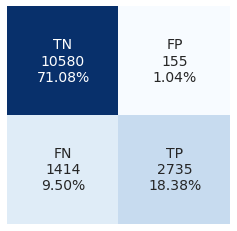

In [ ]:
nb = MultinomialNB()
nb.fit(tfidf_tr, y_train)
y_pr_nb_val = nb.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_test, y_pr_nb_val, nb)
print(classification_report(y_test, y_pr_nb_val))

Accuracy:  0.9391292663262564
F1 Score:  0.8862380713209442
ROC-AUC:  0.976856775382489
Recall:  0.8505664015425404
Precision:  0.9250327653997379
PR-AUC:  0.9534526540393748
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     10735
           1       0.93      0.85      0.89      4149

    accuracy                           0.94     14884
   macro avg       0.93      0.91      0.92     14884
weighted avg       0.94      0.94      0.94     14884



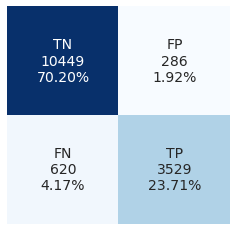

In [ ]:
rf = RandomForestClassifier(n_estimators=100).fit(tfidf_tr, y_train)
y_pr_rf_val = rf.predict(tfidf_val)
#acc = accuracy_score(y_test, y_pr_rf_val)
#print(acc)
get_metrics_confusion(tfidf_val, y_test, y_pr_rf_val, rf)
print(classification_report(y_test, y_pr_rf_val))

Accuracy:  0.8694571351787154
F1 Score:  0.7304009990287221
ROC-AUC:  0.8960306258386513
Recall:  0.6343697276452157
Precision:  0.8606932635709614
PR-AUC:  0.815292762626081
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     10735
           1       0.86      0.63      0.73      4149

    accuracy                           0.87     14884
   macro avg       0.87      0.80      0.82     14884
weighted avg       0.87      0.87      0.86     14884



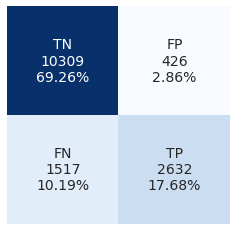

In [ ]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200).fit(tfidf_tr, y_train)
y_pr_abc_val = abc.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_test, y_pr_abc_val, abc)
print(classification_report(y_test, y_pr_abc_val))

Accuracy:  0.8313625369524321
F1 Score:  0.5900032669062397
ROC-AUC:  0.8575799601769349
Recall:  0.43528561099060015
Precision:  0.9153573238722758
PR-AUC:  0.7540979813926687
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     10735
           1       0.92      0.44      0.59      4149

    accuracy                           0.83     14884
   macro avg       0.87      0.71      0.74     14884
weighted avg       0.85      0.83      0.81     14884



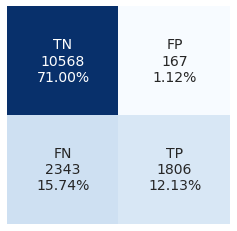

In [ ]:
gbc = GradientBoostingClassifier().fit(tfidf_tr, y_train)
y_pr_gbc_val = gbc.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_test, y_pr_gbc_val, gbc)
print(classification_report(y_test, y_pr_gbc_val))

Accuracy:  0.9289841440472991
F1:  0.8690048333126782
Recall:  0.8450228970836346
Precision:  0.8943877551020408
ROC-AUC:  0.9736418099748055
PR-AUC:  0.9422333799105799
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10735
           1       0.89      0.85      0.87      4149

    accuracy                           0.93     14884
   macro avg       0.92      0.90      0.91     14884
weighted avg       0.93      0.93      0.93     14884



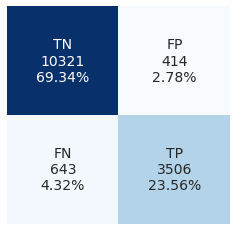

In [ ]:
svc = svm.LinearSVC(random_state=42).fit(tfidf_tr, y_train)
y_pr_svc_val = svc.predict(tfidf_val)
get_metrics_2(tfidf_val, y_test, y_pr_svc_val, svc)
get_confusion(y_test, y_pr_svc_val)
print(classification_report(y_test, y_pr_svc_val))

Accuracy:  0.8907551733404999
F1 Score:  0.7764026402640264
ROC-AUC:  0.9589270112168936
Recall:  0.6804049168474331
Precision:  0.9039385206532181
PR-AUC:  0.9077787452012547
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     10735
           1       0.90      0.68      0.78      4149

    accuracy                           0.89     14884
   macro avg       0.90      0.83      0.85     14884
weighted avg       0.89      0.89      0.89     14884



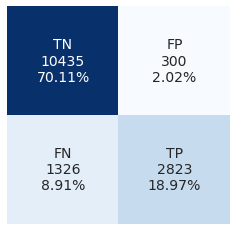

In [ ]:
log = LogisticRegression(random_state=42).fit(tfidf_tr, y_train)
y_pr_log_val = log.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_test, y_pr_log_val, log)
print(classification_report(y_test, y_pr_log_val))

### **Random Under Sampler** 

In [ ]:
rus = RandomUnderSampler()
X_tr_rus, y_tr_rus = rus.fit_resample(tfidf_tr, y_train)
counter_rus = Counter(y_tr_rus)
print("Random Undersampler: ", counter_rus)

Random Undersampler:  Counter({0: 12228, 1: 12228})


Accuracy:  0.847823165815641
F1 Score:  0.7760308513794126
ROC-AUC:  0.9585647935322152
Recall:  0.9457700650759219
Precision:  0.6579476861167002
PR-AUC:  0.9142743072813602
              precision    recall  f1-score   support

           0       0.97      0.81      0.88     10735
           1       0.66      0.95      0.78      4149

    accuracy                           0.85     14884
   macro avg       0.82      0.88      0.83     14884
weighted avg       0.89      0.85      0.85     14884



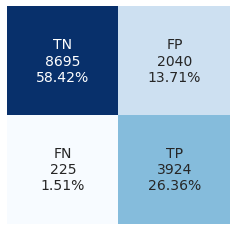

In [ ]:
nb2 = MultinomialNB().fit(X_tr_rus, y_tr_rus)
y_pr_nb2_val = nb2.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_test, y_pr_nb2_val, nb2)
print(classification_report(y_test, y_pr_nb2_val))

Accuracy:  0.9091642031711905
F1 Score:  0.8477477477477477
ROC-AUC:  0.9689627962944815
Recall:  0.9072065557965775
Precision:  0.7956034664975692
PR-AUC:  0.93873785881417
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     10735
           1       0.80      0.91      0.85      4149

    accuracy                           0.91     14884
   macro avg       0.88      0.91      0.89     14884
weighted avg       0.92      0.91      0.91     14884



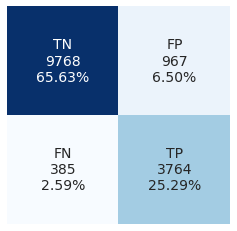

In [ ]:
rf2 = RandomForestClassifier(n_estimators=100).fit(X_tr_rus, y_tr_rus)
y_pr_rf2_val = rf2.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_test, y_pr_rf2_val, rf2)
print(classification_report(y_test, y_pr_rf2_val))

Accuracy:  0.8574307981725343
F1 Score:  0.7470195517405819
ROC-AUC:  0.8977395577836894
Recall:  0.755121716076163
Precision:  0.7390894078792168
PR-AUC:  0.8171810086361443
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     10735
           1       0.74      0.76      0.75      4149

    accuracy                           0.86     14884
   macro avg       0.82      0.83      0.82     14884
weighted avg       0.86      0.86      0.86     14884



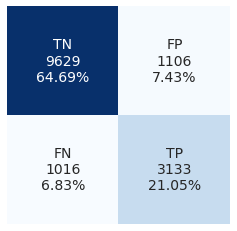

In [ ]:
abc2 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200).fit(X_tr_rus, y_tr_rus)
y_pr_abc2_val = abc2.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_test, y_pr_abc2_val, abc2)
print(classification_report(y_test, y_pr_abc2_val))

Accuracy:  0.8447997850040312
F1 Score:  0.6935526664897851
ROC-AUC:  0.8615447878136975
Recall:  0.6300313328512894
Precision:  0.7713189731484213
PR-AUC:  0.7434671791453218


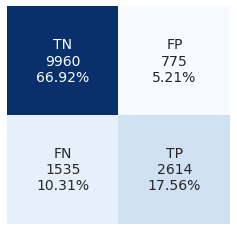

In [ ]:
gbc2 = GradientBoostingClassifier().fit(X_tr_rus, y_tr_rus)
y_pr_gbc2_val = gbc2.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_test, y_pr_gbc2_val, gbc2)

Accuracy:  0.8948535339962376
F1 Score:  0.8209996568683517
ROC-AUC:  0.9524658721586888
Recall:  0.8650277175222946
Precision:  0.7812363952982151
PR-AUC:  0.8909446842866422


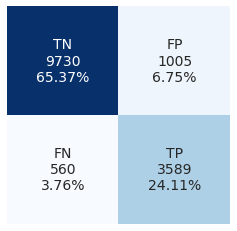

In [ ]:
log2 = LogisticRegression().fit(X_tr_rus, y_tr_rus)
y_pr_log2_val = log2.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_test, y_pr_log2_val, log2)

In [ ]:
svc2 = svm.LinearSVC(random_state=42).fit(X_tr_rus, y_tr_rus)
y_pr_svc2_val = svc2.predict(tfidf_val)
get_metrics_2(tfidf_val, y_test, y_pr_svc2_val, svc2)

Accuracy:  0.9076189196452566
F1:  0.8465573038723356
Recall:  0.9141961918534587
Precision:  0.7882377389858687
ROC-AUC:  0.9678503459231651
PR-AUC:  0.9256089537281025


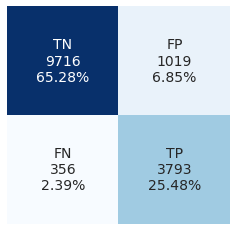

In [ ]:
get_confusion(y_test, y_pr_svc2_val)

In [ ]:
seed = 42
np.random.seed(seed)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [ ]:
tvec = TfidfVectorizer(max_features=100000, ngram_range=(1, 3))

In [ ]:
X_train.values.sum()

"['littlest', 'thing', 'mean', 'ð']['flightless', 'bird', 'ironandwine', 'gay', 'gayboys', 'instagram', 'instagay', 'follow', 'heyboo']['happiest', 'place', 'each', 'california', 'disneyland', 'magical', 'local', 'disneyland']['u', 'neonazis', 'antisemitic', 'emboldened', 'trump', 'win', 'gop']['tell', 'jeffrey', 'upwards', 'adenosine', 'monophosphate', 'beauregard', 'upward', 'user', 'le', 'quit', 'foolin', 'upwards', 'upward', 'around', 'come', 'fall', 'wayside', 'pick', 'hood', 'upwards', 'fall', 'wayside', 'sheet', 'saturdayâ']['trumpsamerica', 'user', 'empowered', 'via', 'arrest', 'fowoh', 'mother', 'ðð', 'feeling']['cum', 'forbidden', 'god', 'know', 'would', 'come', 'forbidden', 'africa', 'forbid', 'come', 'black', 'could', 'come', 'come', 'fact', 'finding', 'upwards', 'investigative', 'journalism', 'upward']['surprise', 'another', 'round', 'last', 'time', 'time', 'mr']['auth', 'nurse', 'begin', 'indefinite', 'strike']['one', 'person', 'many', 'u', 'voice', 'resource', 'experienc

In [ ]:
def batch_generator(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield np.array(X_batch), np.array(y_batch)
        if (counter > number_of_batches):
            counter=0

In [ ]:
tfidf_tr.shape[0]

44652

In [ ]:
#%%time
model = Sequential()
model.add(Dense(64, activation = 'relu', input_dim = 100000))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit_generator(generator = batch_generator(tfidf_tr, y_train, 32),
                    epochs = 10, 
                    random_state = 42,
                  validation_data = (tfidf_val, y_test),
                    steps_per_epoch = 34845/32)

TypeError: ignored